# Assignment 4 - Working with Categorical Data

**Import Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

**Import Data**

In [5]:
# Import csv as dataframe with only the columns START_YEAR, TOTAL_PERSONNEL_SUM, COMPLEX, FUEL_MODEL, and POO_STATE.
# Additionaly, correct the dtype of the complex column.
keep_columns = ['START_YEAR', 'TOTAL_PERSONNEL_SUM', 'COMPLEX', 'FUEL_MODEL', 'POO_STATE']
set_dtype = {'COMPLEX' : 'category'}
wf_df = pd.read_csv(r'C:\Users\JohnTaylor\DSTP_Assignments\Data\Assignment_4_Data\ics209-plus-wf_incidents_1999to2020.csv', usecols=keep_columns, dtype=set_dtype)
wf_df.head()

,COMPLEX,FUEL_MODEL,POO_STATE,START_YEAR,TOTAL_PERSONNEL_SUM
0,False,NaN,AK,1999.0,2489.0
1,False,NaN,AK,1999.0,4889.0
2,False,NaN,AK,1999.0,683.0
3,False,NaN,AK,1999.0,NaN
4,False,NaN,AK,1999.0,992.0


**1a/b -  Subset the data to only include incidents occuring in or after 2014 and only include incidents with 10 or more total personnel**

In [8]:
# Create a filter
incident_filter = (wf_df['START_YEAR'] >= 2014) & (wf_df['TOTAL_PERSONNEL_SUM'] >= 10)
incident_filter.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [9]:
# Apply the filter
wf_df = wf_df.loc[incident_filter]
wf_df.head()

,COMPLEX,FUEL_MODEL,POO_STATE,START_YEAR,TOTAL_PERSONNEL_SUM
23181,False,Short Grass (1 foot),CA,2014.0,51.333333
23183,False,Timber (Grass and Understory),NV,2014.0,275.916667
23184,False,Light Logging Slash,OR,2014.0,1195.583333
23185,False,Timber (Litter and Understory),ID,2014.0,20.000000
23191,False,Southern Rough,LA,2014.0,16.000000


**2 - Check for missing data in the FUEL_MODEL variable. If there are empty strings, convert to NA or NaN.**

In [10]:
# Check for missing data
wf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7121 entries, 23181 to 34620
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COMPLEX              7121 non-null   category
 1   FUEL_MODEL           7093 non-null   object  
 2   POO_STATE            7121 non-null   object  
 3   START_YEAR           7121 non-null   float64 
 4   TOTAL_PERSONNEL_SUM  7121 non-null   float64 
dtypes: category(1), float64(2), object(2)
memory usage: 285.1+ KB


In [13]:
# Check for empty strings and typos
wf_df['FUEL_MODEL'].value_counts()

FUEL_MODEL
Short Grass (1 foot)              1278
Timber (Litter and Understory)    1272
Tall Grass (2.5 feet)             1147
Timber (Grass and Understory)     1140
Brush (2 feet)                     742
Hardwood Litter                    655
Southern Rough                     399
Chaparral (6 feet)                 219
Closed Timber Litter                86
Medium Logging Slash                49
Dormant Brush, Hardwood Slash       47
Heavy Logging Slash                 35
Light Logging Slash                 24
Name: count, dtype: int64

In [14]:
# No empty strings, but we can replace null values with 'unknown' so the rest of the data doesn't get lost
wf_df['FUEL_MODEL'] = wf_df['FUEL_MODEL'].fillna('Unknown')
wf_df['FUEL_MODEL'].value_counts()

FUEL_MODEL
Short Grass (1 foot)              1278
Timber (Litter and Understory)    1272
Tall Grass (2.5 feet)             1147
Timber (Grass and Understory)     1140
Brush (2 feet)                     742
Hardwood Litter                    655
Southern Rough                     399
Chaparral (6 feet)                 219
Closed Timber Litter                86
Medium Logging Slash                49
Dormant Brush, Hardwood Slash       47
Heavy Logging Slash                 35
Unknown                             28
Light Logging Slash                 24
Name: count, dtype: int64

**3 - Create a dataframe of counts for each fuel model type. What fuel type is most/least common? Is there anything odd about the categories?**

In [16]:
# Create a sorted dataframe of fuel model counts
fuel_df = wf_df.groupby('FUEL_MODEL')['FUEL_MODEL'].count().reset_index(name='COUNT')
fuel_df

,FUEL_MODEL,COUNT
0,Brush (2 feet),742
1,Chaparral (6 feet),219
2,Closed Timber Litter,86
3,"Dormant Brush, Hardwood Slash",47
4,Hardwood Litter,655
5,Heavy Logging Slash,35
6,Light Logging Slash,24
7,Medium Logging Slash,49
8,Short Grass (1 foot),1278
9,Southern Rough,399


- The most common fuel type is "Short Grass (1 foot)". 
- The least common fuel type is "Light Logging Slash". 
- The top 4 fuel types are clearly much more common than other fuel types. 

**4 - Create a new factor/category variable from Fuel Model and order by number of observations in each category.**

In [20]:
# Sort the fuel dataframe by count
fuel_df = fuel_df.sort_values(by = 'COUNT', ascending = False)
fuel_category = fuel_df['FUEL_MODEL'].to_list()
print(fuel_category)

['Short Grass (1 foot)', 'Timber (Litter and Understory)', 'Tall Grass (2.5 feet)', 'Timber (Grass and Understory)', 'Brush (2 feet)', 'Hardwood Litter', 'Southern Rough', 'Chaparral (6 feet)', 'Closed Timber Litter', 'Medium Logging Slash', 'Dormant Brush, Hardwood Slash', 'Heavy Logging Slash', 'Unknown', 'Light Logging Slash']


In [22]:
# Create category variable
wf_df['FUEL_CATEGORY'] = pd.Categorical(wf_df['FUEL_MODEL'], categories=fuel_category, ordered=True)
wf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7121 entries, 23181 to 34620
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   COMPLEX              7121 non-null   category
 1   FUEL_MODEL           7121 non-null   object  
 2   POO_STATE            7121 non-null   object  
 3   START_YEAR           7121 non-null   float64 
 4   TOTAL_PERSONNEL_SUM  7121 non-null   float64 
 5   FUEL_CATEGORY        7121 non-null   category
dtypes: category(2), float64(2), object(2)
memory usage: 292.7+ KB


**5 - Use an ordered bar chart to visualize the counts of Fuel Model observations in each category.**

In [23]:
%matplotlib inline

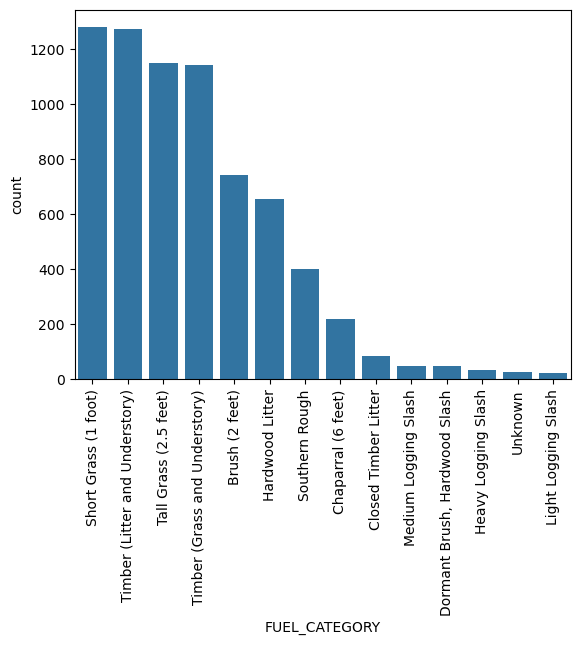

In [29]:
sns.countplot(data=wf_df, x='FUEL_CATEGORY')
plt.xticks(rotation=90)
plt.show()

**6 - Create a contingency table/cross tabulation of Fuel Model and whether the incident was classified as a complex. Which fuel type is most common on complexes?**

In [30]:
# Create a cross tabulation
pd.crosstab(wf_df['FUEL_CATEGORY'], wf_df['COMPLEX'])

COMPLEX,False,True
FUEL_CATEGORY,,
Short Grass (1 foot),1270,8
Timber (Litter and Understory),1219,53
Tall Grass (2.5 feet),1129,18
Timber (Grass and Understory),1107,33
Brush (2 feet),730,12
Hardwood Litter,653,2
Southern Rough,397,2
Chaparral (6 feet),216,3
Closed Timber Litter,82,4


The fuel type "Timber (Litter and Understory) had the highest number of occurances in complex fires.

**7 - Create a contingency table/cross tabulation of Point-of-Origin State. What are the states with the most incidents that were classified as a complex? How many states had no incidents classified as a complex?**

In [33]:
poo_cross = pd.crosstab(wf_df['POO_STATE'], wf_df['COMPLEX'])
poo_cross

COMPLEX,False,True
POO_STATE,,
AK,255,6
AL,26,0
AR,87,0
AZ,440,1
CA,699,29
CO,232,3
FL,381,2
GA,60,0
HI,12,0


In [35]:
# What are the states with the most complex incidents?
poo_cross = poo_cross.sort_values(by=['True','False'], ascending=False).reset_index()
poo_cross[0:5]

COMPLEX,index,POO_STATE,False,True
0,0,CA,699,29
1,1,OR,376,25
2,2,ID,458,23
3,3,WA,333,14
4,4,MT,446,10


California, Oregon, Idaho, Washington, and Montana had the most incidents classified as Complex.

In [40]:
# How many states had no incidents classified as complex?
poo_filter = poo_cross['True'] == 0
no_complex = poo_cross.loc[poo_filter]
print('There were {} states with no incidients classified as a Complex fire.'.format(len(no_complex)))

There were 29 states with no incidients classified as a Complex fire.
